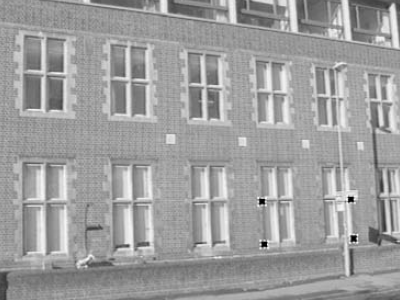

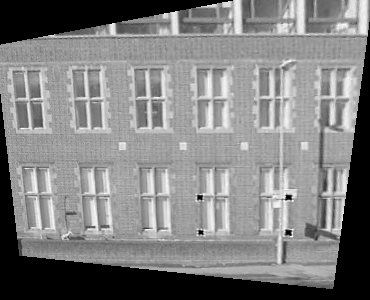

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import transform

# Read and view an image
A = cv2.imread("homework4.pgm", cv2.IMREAD_GRAYSCALE)
cv2_imshow(A)

# Get height and width of source image
M1 = A.shape[0]
N1 = A.shape[1]


M = np.array([[232, 216, 1, 0 ,0, 0, -232*244, -216*244],
              [0, 0 ,0, 232 ,216, 1 ,-232*263, -216*263],
              [232, 311, 1, 0, 0, 0 ,-232*238 ,-311*238],
              [0, 0 ,0, 232, 311, 1, -232*353 ,-311*353],
              [197, 311, 1, 0, 0, 0, -197*199, -311*199],
              [0, 0, 0, 197, 311, 1, -197*350, -311*350],
              [197 ,216, 1, 0 ,0 ,0 ,-197*201 ,-216*201],
              [0, 0 ,0, 197, 216, 1 ,-197*262, -216*262]])

c = np.array([[244], [263] ,[238], [353], [199], [350], [201], [262]])

H = np.linalg.solve(M,c)
H = np.insert(H,8,1)

H = np.reshape(H, (3,3))

# Set height and width of target image
M2 = 300
N2 = 370

# new image
B = np.zeros((M2,N2))

# Bilinear interpolation
for i in range(0,M2):
  for j in range(0,N2):
    x = (i + 0.5) * M1/M2
    y = (j + 0.5) * N1/N2
    p = np.array([x,y,1])
    q = np.dot(H,p)
    x = q[0]/q[2]
    y = q[1]/q[2]
    k = math.floor(x) - 1
    l = math.floor(y) - 1
    u = x - k - 0.5
    v = y - l - 0.5
    if ((k >= 0) and (k < M1-1) and (l >= 0) and (l < N1-1)):
      B[i,j] = round( (1-v) * ( (1-u)*A[k,l] + u*A[k+1,l] ) + v * ( (1-u)*A[k,l+1] + u*A[k+1,l+1] ) )

cv2_imshow(B)